In [0]:
import numpy as np
import matplotlib.pyplot as plt

In [0]:
def F(x):
  return 4 * np.sin(np.pi * x) * np.cos(6 * np.pi * x ** 2)

def gen_data(F, n=30):
  x = np.random.uniform(size=(n, 1))
  y = F(x) + np.random.normal(size=(n, 1))
  return x, y

In [0]:
def gen_k_poly(d=2):
  def k_poly(x, z):
    return (1 + np.dot(x, z)) ** d
  return k_poly

def gen_k_rbf(gamma=0.1):
  def k_rbf(x, z):
    return np.exp(-gamma * np.linalg.norm(x - z) ** 2)
  return k_rbf

In [0]:
def LOO_cross_val(x, y, k_fn, l_reg=0.1):
  n, d = np.shape(x)
  K = np.zeros((n, n))
  for i in range(n):
    for j in range(n):
      K[i, j] = k_fn(x[i, :], x[j, :])

  y_pred = np.zeros((n, 1))
  for i in range(n):
    out_x, out_y = x[i, :], y[i]
    cur_idxs = [j for j in range(n) if j != i]
    cur_x, cur_y = x[cur_idxs, :], y[cur_idxs]
    cur_n, d = np.shape(cur_x)
    cur_K = K[cur_idxs, cur_idxs]
    I = np.eye(cur_n)
    alpha = np.linalg.pinv(cur_K + l_reg * I) @ cur_y

    expanded_out_x = K[i, cur_idxs]
    y_pred[i, 0] = np.dot(alpha[:,0], expanded_out_x)
  return y_pred

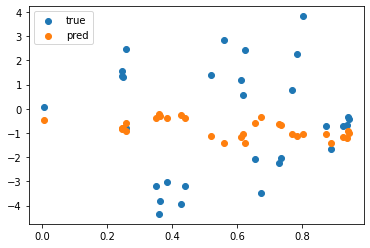

In [62]:
for i in range(1):
  x, y = gen_data(F)
  y_pred = LOO_cross_val(x, y, gen_k_poly(d=5), l_reg=10)
  plt.scatter(list(x), list(y))
  plt.scatter(list(x), list(y_pred))
  plt.legend(['true', 'pred'])
  plt.show()